# PBN that use both the original model and the derived KG model


Sensitivity analysis of the PBN


In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import itertools
import pickle
# import booleanNetwork module from ./src
from BNMPy import booleanNetwork as bn
from BNMPy import BMatrix  
from BNMPy import PBN
from BNMPy import vis

## Merge the two models to a PBN
### The original model

Eduati 2020 Model from the paper: doi: 10.15252/msb.209690 (link: https://www.ncbi.nlm.nih.gov/pubmed/32073727)

In [3]:
with open('input_files/Eduati2020.txt', 'r') as f:
    original_string = f.read()
print(original_string)

EGF = EGF
EGFR = EGF
PDPK1 = PDPK1
TNF = TNF
TNFRs = NFkB | TNF
A20 = NFkB
APC = Apaf1 & Cas9 & Mito | ! cIAPs
Akt = AktM & AktP
AktM = PDPK1 & PIP3
AktP = PDPK1 & PIP3
Apaf1 = p53
BAD = p53 | ! RSK | ! Akt
BID = JNK & p53 | Cas8 & p53 | ! BclX
BclX = ! p53 | STAT | NFkB | ! BAD
Cas12 = Cas7
Cas3 = ! cIAPs | Cas8 | Cas6 | APC
Cas6 = ! cIAPs | Cas3
Cas7 = ! cIAPs | Cas8 | APC
Cas8 = complexIIB | complexIIA | Cas6
Cas9 = ! cIAPs | ! ERK | Cas3 | Cas12 | ! Akt
ERK = MEK
IKKs = complexI | PDPK1 | Akt | ! A20
IkB = NFkB | ! IKKs
JAK = EGFR
JNK = JNKK
JNKK = MEKK1 | ! Akt
MEK = RAF | PDPK1
MEKK1 = complexI | RAS
Mdm2 = p53 | Akt
Mito = ! BclX | BID
NFkB = NIK | ! IkB
NIK = ! cIAPs
PI3K = RAS | EGFR
PIP3 = ! PTEN | PI3K
PTEN = p53
RAF = RAS
RAS = SOS
RSK = ERK
SOS = ! ERK | EGFR
STAT = JAK
cFLIP = NFkB
cIAPs = ! Cas3 & ! Cas6 | NFkB | ! Mito
complexI = TNFRs
complexIIA = complexI | ! cFLIP
complexIIB = complexI | ! cIAPs
p53 = ! Mdm2 | JNK | ERK


In [4]:
mapping = 'input_files/Eduati2020_curation.xlsx'
new_string = BMatrix.rename_nodes(original_string, mapping)
print(new_string)

EGF = EGF
EGFR = EGF
PDPK1 = PDPK1
TNF = TNF
TNFRSF1A = NFKB1 | TNF
TNFAIP3 = NFKB1
APC = APAF1 & CASP9 & Mito | ! BIRC2
AKT1 = AktM & AktP
AktM = PDPK1 & PIP3
AktP = PDPK1 & PIP3
APAF1 = TP53
BAD = TP53 | ! RPS6KA1 | ! AKT1
BID = MAPK8 & TP53 | CASP8 & TP53 | ! BCL2L1
BCL2L1 = ! TP53 | STAT3 | NFKB1 | ! BAD
CASP12 = CASP7
CASP3 = ! BIRC2 | CASP8 | CASP6 | APC
CASP6 = ! BIRC2 | CASP3
CASP7 = ! BIRC2 | CASP8 | APC
CASP8 = (RIPK1 & TRADD & FADD & CASP8 & CFLAR) | (TRADD & RIPK1 & FADD & CASP8) | CASP6
CASP9 = ! BIRC2 | ! MAPK1 | CASP3 | CASP12 | ! AKT1
MAPK1 = MAP2K1
IKBKB = (RIPK1 & TRADD & TRAF2) | PDPK1 | AKT1 | ! TNFAIP3
NFKBIA = NFKB1 | ! IKBKB
JAK1 = EGFR
MAPK8 = MAP2K4
MAP2K4 = MAP3K1 | ! AKT1
MAP2K1 = RAF1 | PDPK1
MAP3K1 = (RIPK1 & TRADD & TRAF2) | KRAS
MDM2 = TP53 | AKT1
Mito = ! BCL2L1 | BID
NFKB1 = MAP3K14 | ! NFKBIA
MAP3K14 = ! BIRC2
PIK3CA = KRAS | EGFR
PIP3 = ! PTEN | PIK3CA
PTEN = TP53
RAF1 = KRAS
KRAS = SOS1
RPS6KA1 = MAPK1
SOS1 = ! MAPK1 | EGFR
STAT3 = JAK1
CFLAR = NFKB1

In [12]:
# visualize the KG
logic_rules = vis.read_logic_rules(KG_string)
vis.vis_logic_graph(logic_rules, output_html = "Output/Eduati2020_standardized.html") # visualize the logic graph, in an html file. view it in a browser.

with open('input_files/Eduati2020_standardized.txt', 'w') as f:
    f.write(new_string)

network = BMatrix.load_network_from_string(new_string)

Output/Eduati2020_standardized.html
No initial state provided, using a random initial state


### The derived KG model

See `knowledge_graph.ipynb` for more details.

In [6]:
from BNMPy import build_bn_from_kg
network = BMatrix.load_network_from_string(new_string)
genes = network.nodeDict.keys()
KG_string, relations = build_bn_from_kg.load_signor_network(genes, joiner='inhibitor_wins')
print(KG_string)

No initial state provided, using a random initial state
number of genes found: 43
[1950, 1956, 5170, 7124, 7132, 7128, 324, 207, 317, 572, 637, 598, 100506742, 836, 839, 840, 841, 842, 5594, 3551, 4792, 3716, 5599, 6416, 5604, 4214, 4193, 4790, 9020, 5290, 5728, 5894, 3845, 6195, 6654, 6774, 8837, 329, 8737, 8717, 7186, 8772, 7157]
TNFAIP3 = TNFAIP3
STAT3 = MAPK8 | JAK1 | EGFR | MAP3K1
MAPK8 = MAP2K4
BAD = (!MAPK8 & !PRKACA & !IKBKB & !AKT1 & !MAPK1 & !RPS6KA1 & !RAF1) & (CASP3 | BCL2L1)
PRKACA = AKT1
MDM2 = AKT1 | TP53
RIPK1 = (!TNFAIP3 & !CASP8) & (TRADD | FADD | TRAF2 | BIRC2)
IKBKB = (!IKBKB & !CASP3) & (MAP3K14)
MAP3K14 = (!TRAF2) & (MAP3K14)
TNF = TNF
TNFRSF1A = (!MAPK1) & (TNF)
AKT1 = (!PTEN & !CASP3) & (MAPK8 | TNF | PDPK1 | PIK3CA)
JAK1 = EGFR
MAPK1 = MAPK1 | MAP2K1
RPS6KA1 = MAPK1 | RPS6KA1 | PDPK1 | TP53
EGFR = (!MAPK1) & (EGFR | TP53 | EGF)
PDPK1 = PDPK1
TP53 = (!MDM2) & (MAPK8 | BAD)
BID = TP53 | CASP8
PTEN = PTEN
PIK3CA = (!PTEN) & (TNF | KRAS)
TRADD = TNFRSF1A
CASP8 = (!

In [11]:
# visualize the KG
logic_rules = vis.read_logic_rules(KG_string)
vis.vis_logic_graph(logic_rules, output_html = "output/Eduati2020_kg_inhibitor_wins.html") # visualize the logic graph, in an html file. view it in a browser.

Eduati2020_kg_inhibitor_wins.html


### Merge the two models to a PBN

In [7]:
def merge_PBN_string(original_string, KG_string, prob=0.5):
    """
    Merge the original model and the KG model to a PBN
    prob: probability of the equations from the original model
    """
    # Parse equations from both models
    original_equations = {}
    for line in original_string.strip().split('\n'):
        if '=' in line:
            target, rule = line.split('=', 1)
            original_equations[target.strip()] = rule.strip()
    
    kg_equations = {}
    for line in KG_string.strip().split('\n'):
        if '=' in line:
            target, rule = line.split('=', 1)
            kg_equations[target.strip()] = rule.strip()
    
    # Merge equations
    merged_equations = []
    all_targets = set(original_equations.keys()) | set(kg_equations.keys())
    
    for target in all_targets:
        if target in original_equations and target in kg_equations:
            if original_equations[target] == kg_equations[target]:
                # Both models have the same equation for this target
                merged_equations.append(f"{target} = {original_equations[target]}, 1")
            else:
                # Use both with specified probabilities
                merged_equations.append(f"{target} = {original_equations[target]}, {prob}")
                merged_equations.append(f"{target} = {kg_equations[target]}, {1-prob}")
        elif target in original_equations:
            # Only original model has this target
            merged_equations.append(f"{target} = {original_equations[target]}, 1")
            print(f"Only original model has this target: {target}")
        else:
            # Only KG model has this target
            print("Only KG model has this target:", target)
            merged_equations.append(f"{target} = {kg_equations[target]}, 1")
    
    # remove equation with prob = 0
    merged_equations = [eq for eq in merged_equations if eq.split(',')[1] != ' 0']
    merged_string = '\n'.join(merged_equations)
    return merged_string

merged_string = merge_PBN_string(new_string, KG_string, prob=0.6)
print(merged_string)

Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
CASP8 = (RIPK1 & TRADD & TRAF2) | ! BIRC2, 0.6
CASP8 = (!MAPK1 & !CFLAR) & (RIPK1 | TRADD | FADD | CASP6), 0.4
MAP3K14 = ! BIRC2, 0.6
MAP3K14 = (!TRAF2) & (MAP3K14), 0.4
STAT3 = JAK1, 0.6
STAT3 = MAPK8 | JAK1 | EGFR | MAP3K1, 0.4
EGF = EGF, 1
PRKACA = AKT1, 1
AktP = PDPK1 & PIP3, 1
BID = MAPK8 & TP53 | CASP8 & TP53 | ! BCL2L1, 0.6
BID = TP53 | CASP8, 0.4
AKT1 = AktM & AktP, 0.6
AKT1 = (!PTEN & !CASP3) & (MAPK8 | TNF | PDPK1 | PIK3CA), 0.4
CASP12 = CASP7, 0.6
CASP12 = CASP12, 0.4
APC = APAF1 & CASP9 & Mito | ! BIRC2, 0.6
APC = !PRKACA, 0.4
PDPK1 = PDPK1, 1
NFKBIA = NFKB1 | ! IKBKB, 0.6
NFKBIA = (!IKBKB & !TNFRSF1A) & (CASP3), 0.4
IKBKB = (RIPK1 & TRADD & TRAF2) | PDPK1 | AKT1 | ! TNFAIP3, 0.6
IKBKB = (!IKBKB & !CASP3) & (MAP3K14), 0.4
MAP2K1 = RAF1 | PDPK1, 0.6
MAP2K1 = (!MAPK1) & (PD

## Simulation setup

Output: Cas3 status, which represents apoptosis activity

In [8]:
# Dic file to specify how should the values of the genes be changed when mutated

mutations_dict = {'KRAS': 1, 'TP53': 0, 'MAP2K4': 0}

# List of cell lines and their mutation profiles
## Obtained from the GDSC database
cell_profiles = {}
cell_profiles['AsPC1'] = 'KRAS,TP53'
cell_profiles['BxPC3'] = 'TP53'
cell_profiles['KP4'] = 'KRAS'
cell_profiles['CAPAN1'] = 'KRAS,TP53,MAP2K4'
cell_profiles['Normal'] = ''

# List of perturbation conditions as in the paper Figure 2B
all_treatments = ['EGF,AKT1,PDPK1', # 1st row in Fig 2B
                'EGF,AKT1', # 2nd
                'EGF,PIK3CA', # 3rd
                'EGF,AKT1,PDPK1', # 4th
                'EGF,AKT1,PDPK1,PIK3CA', # 5th
                'EGF,AKT1,PIK3CA', # 6th
                'EGF' # Also test on untreated
                ]

def run_pbn_simulation(prob_value, noise=0.05, n_steps=100000, seed=99):
    """
    Run the full PBN simulation with a specific probability value.
    
    Args:
        prob_value: Probability for original model equations
        noise: Noise level for simulation
        n_steps: Number of simulation steps
        seed: Seed for the random number generator
    
    Returns:
        DataFrame of size differences (using all-zeros baseline)
    """
    np.random.seed(seed)
    
    # Create the merged PBN with specified probability
    merged_string = merge_PBN_string(new_string, KG_string, prob=prob_value)
    pbn = BMatrix.load_pbn_from_string(merged_string)
    
    # Initialize results dataframe
    df_results = pd.DataFrame(index=cell_profiles.keys(), columns=all_treatments)
    
    # Process each cell line
    for cell_line, mutation_profile in cell_profiles.items():
        mutations = mutation_profile.split(',') if mutation_profile else []
        
        # Process each drug treatment
        for condition in all_treatments:
            pbn.undoKnockouts()
            
            # Apply mutations based on cell line 
            for gene in mutations:
                if gene.strip(): 
                    pbn.knockout(gene, mutations_dict[gene])
           
            # Apply drug effects
            ko_genes = condition.split(',') if condition else []
            for ko_gene in ko_genes:
                pbn.knockout(ko_gene, 0)
            
            if noise == 0:
                # Run simulation
                results = pbn.update(n_steps) 
            else:
                # Run simulation
                results = pbn.update_noise(noise, n_steps) 
            cal_range = results[n_steps//2:n_steps]
            average_array = np.mean(cal_range, axis=0)
            output_value = average_array[pbn.nodeDict['CASP3']]
            df_results.loc[cell_line, condition] = output_value
        
    return df_results

# Simulation 


## PBN (0.5)

Using the PBN with probability 0.5 for the original model.

In [14]:
merged_string = merge_PBN_string(new_string, KG_string, prob=0.5)
print(merged_string)
pbn = BMatrix.load_pbn_from_string(merged_string)

Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: Mito
Only original model has this target: AktM
Only KG model has this target: PRKACA
EGFR = EGF, 0.5
EGFR = (!MAPK1) & (EGFR | TP53 | EGF), 0.5
TRADD = (RIPK1 & TRADD & TRAF2) | ! BIRC2, 0.5
TRADD = TNFRSF1A, 0.5
PIK3CA = KRAS | EGFR, 0.5
PIK3CA = (!PTEN) & (TNF | KRAS), 0.5
RIPK1 = (RIPK1 & TRADD & TRAF2) | ! BIRC2, 0.5
RIPK1 = (!TNFAIP3 & !CASP8) & (TRADD | FADD | TRAF2 | BIRC2), 0.5
APC = APAF1 & CASP9 & Mito | ! BIRC2, 0.5
APC = !PRKACA, 0.5
RPS6KA1 = MAPK1, 0.5
RPS6KA1 = MAPK1 | RPS6KA1 | PDPK1 | TP53, 0.5
MAPK1 = MAP2K1, 0.5
MAPK1 = MAPK1 | MAP2K1, 0.5
NFKB1 = MAP3K14 | ! NFKBIA, 0.5
NFKB1 = (!IKBKB & !NFKBIA) & (PRKACA), 0.5
KRAS = SOS1, 1
SOS1 = ! MAPK1 | EGFR, 0.5
SOS1 = !MAPK1, 0.5
IKBKB = (RIPK1 & TRADD & TRAF2) | PDPK1 | AKT1 | ! TNFAIP3, 0.5
IKBKB = (!IKBKB & !CASP3) & (MAP3K14), 0.5
BID = MAPK8 & TP53 | CASP8 & TP53 | ! BCL2L1, 0.5
BID = TP53 | CASP8, 0

## Simulation - with noise
### First, test for convergence for the PBN
Simulate 10000 steps with noise 0.05 for each cell line with no drug treatment.

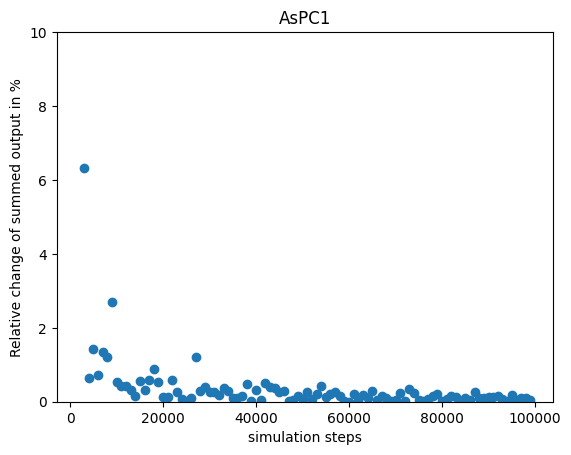

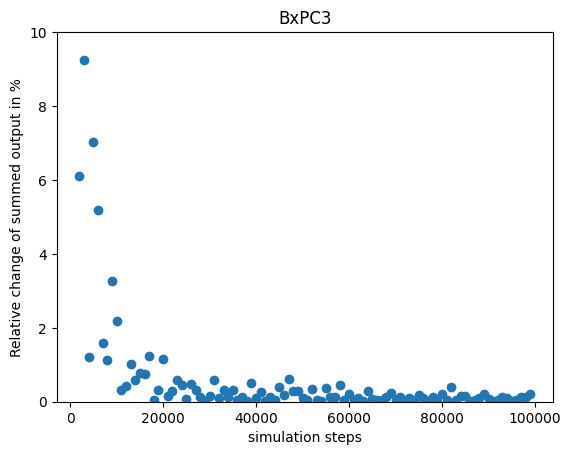

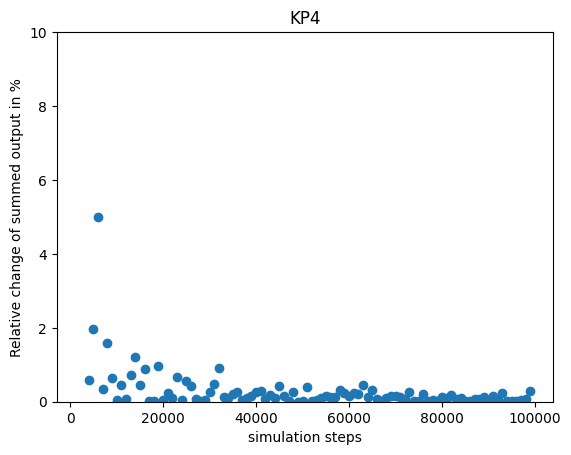

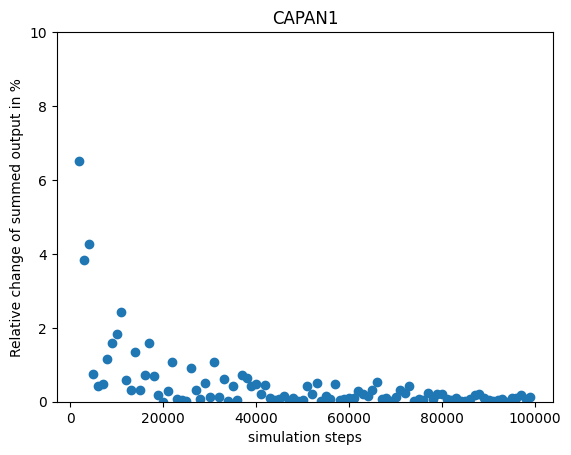

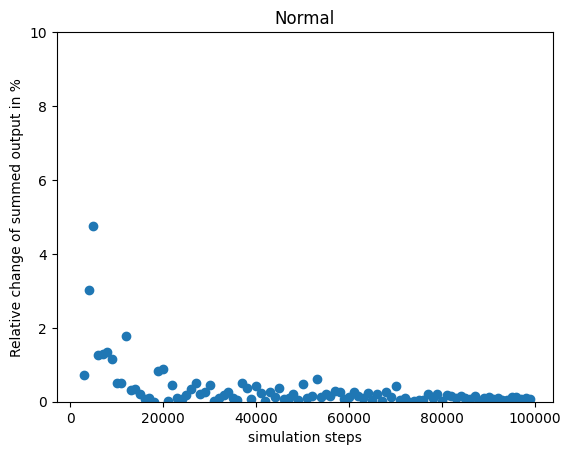

In [18]:
# Test for convergence
n = 100000
noise = 0.05
steps = list(range(1000, 100000, 1000))
scores_steps = {}
for cell_line, mutation_profile in cell_profiles.items():
    scores = []
    scores_array = []
    mutations = mutation_profile.split(',') if mutation_profile else []
    # mutations based on cell line 
    for gene in mutations:
        if gene.strip(): 
            pbn.knockout(gene, mutations_dict[gene])

    pbn_traj = pbn.update_noise(noise, n)
    for step in steps:
        cal_range = pbn_traj[step//2:step]
        average_array = np.mean(cal_range, axis=0)
        output_value = average_array[pbn.nodeDict['CASP3']]
        scores.append(output_value) 
    scores_steps.update({cell_line: scores})

for cell_line in cell_profiles:
    scores = scores_steps[cell_line]
    
    # compute the difference in scores
    rel_diff_scores = []
    for i in range(1, len(scores)):
        diff = scores[i] - scores[i - 1]
        rel_diff_scores.append(100*abs(diff))
    
    
    fig = plt.figure()
    plt.scatter(steps[1:], rel_diff_scores)
    plt.xlabel('simulation steps')
    plt.ylabel('Relative change of summed output in %')
    plt.ylim(0, 10)
    plt.title(f'{cell_line}')
    plt.show()

# Sensitivity analysis
## with no noise, steps = 1000

Running simulation with probability = 0
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


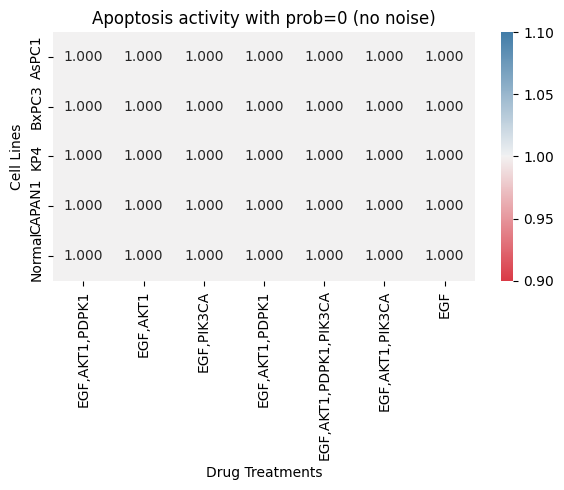

Running simulation with probability = 0.1
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


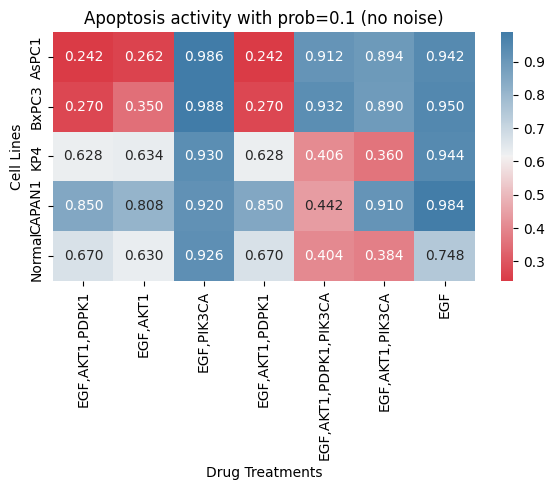

Running simulation with probability = 0.2
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


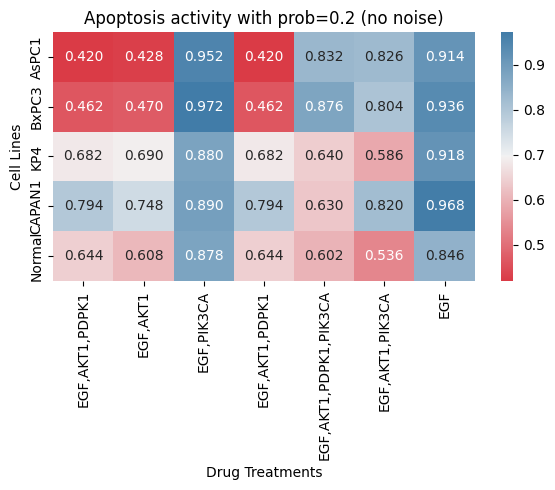

Running simulation with probability = 0.3
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


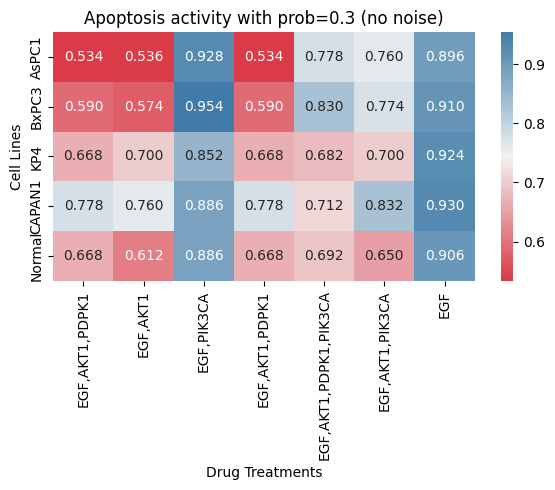

Running simulation with probability = 0.4
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


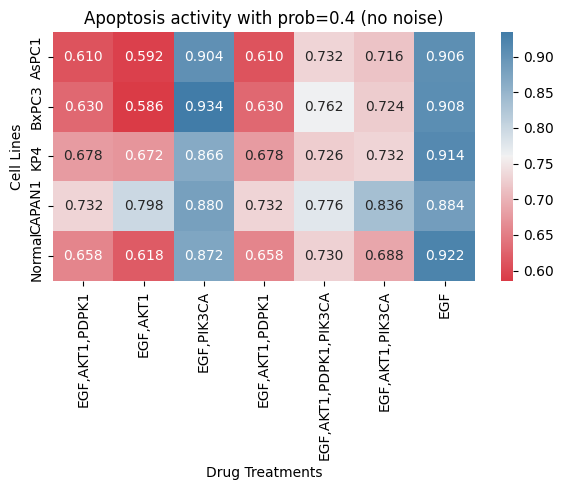

Running simulation with probability = 0.5
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


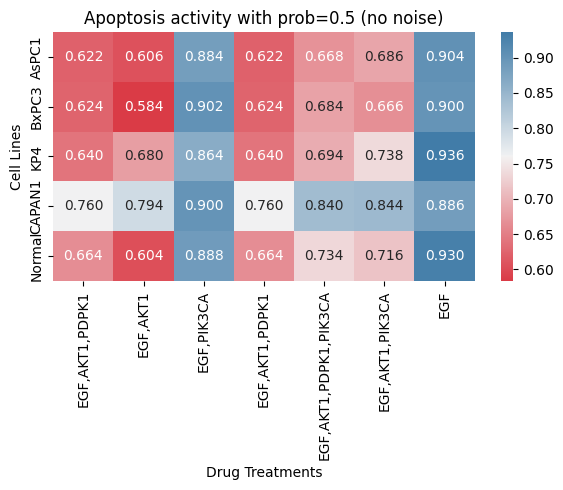

Running simulation with probability = 0.6
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


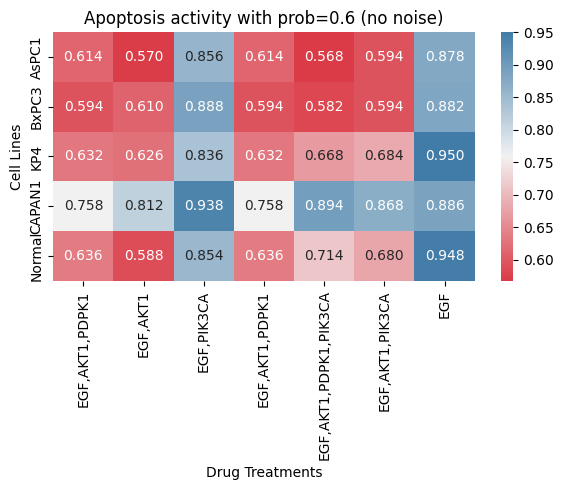

Running simulation with probability = 0.7
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


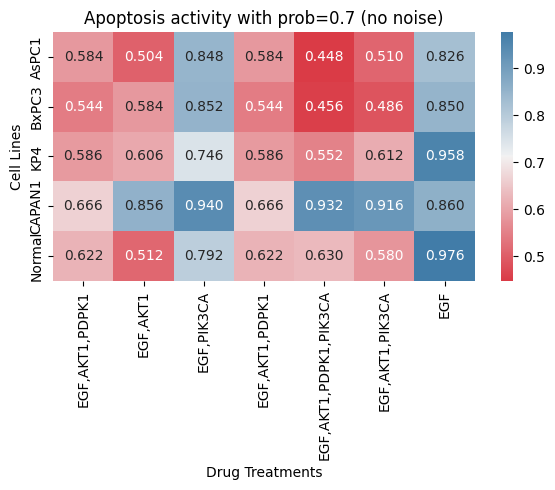

Running simulation with probability = 0.8
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


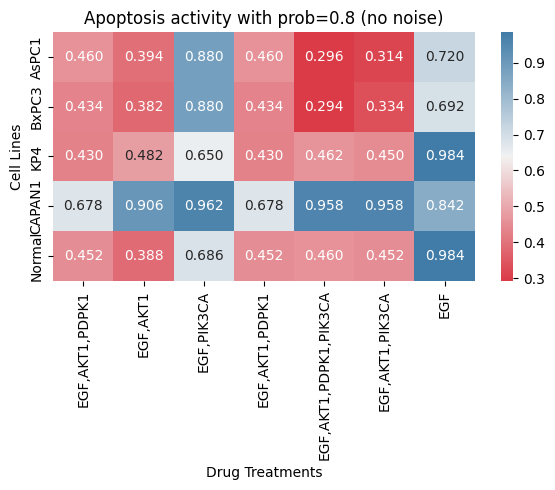

Running simulation with probability = 0.9
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


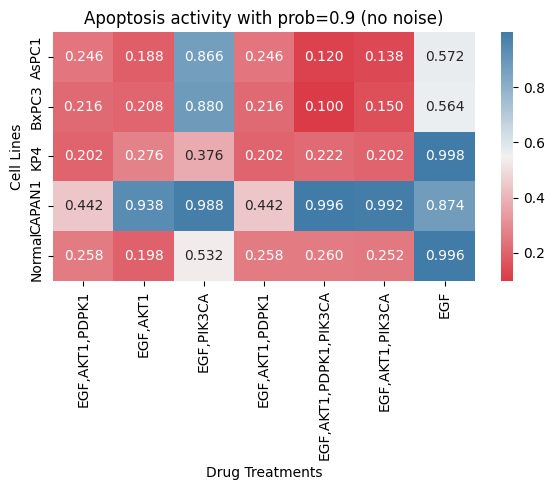

Running simulation with probability = 1
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


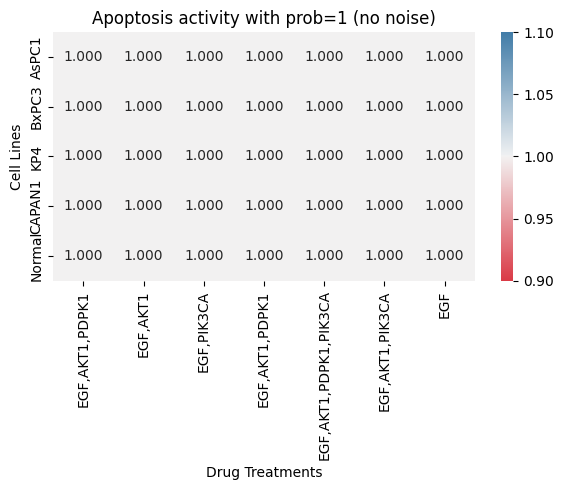

In [9]:
# Run sensitivity analysis for multiple probability values
prob_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
sensitivity_results_no_noise = {}

for prob in prob_values:
    print(f"Running simulation with probability = {prob}")
    results = run_pbn_simulation(prob, noise=0, n_steps=1000)
    sensitivity_results_no_noise[prob] = results
    
    cmap = sns.diverging_palette(10, 240, as_cmap=True)  # Red to Blue
    # vmin = 0.0  # Blue
    # vmax = 0.7  # Red
    # visualize each result individually
    plt.figure(figsize=(6, 5))
    sns.heatmap(results.astype(float), annot=True, cmap=cmap, fmt=".3f")
    plt.title(f"Apoptosis activity with prob={prob} (no noise)")
    plt.ylabel("Cell Lines")
    plt.xlabel("Drug Treatments")
    plt.tight_layout()
    plt.show()

In [10]:
# Save the results dictionary
with open('output/Eduati2020_sensitivity_results_no_noise.pkl', 'wb') as f:
    pickle.dump(sensitivity_results_no_noise, f)

## With noise = 0.05, steps = 100000

Running simulation with probability = 0
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


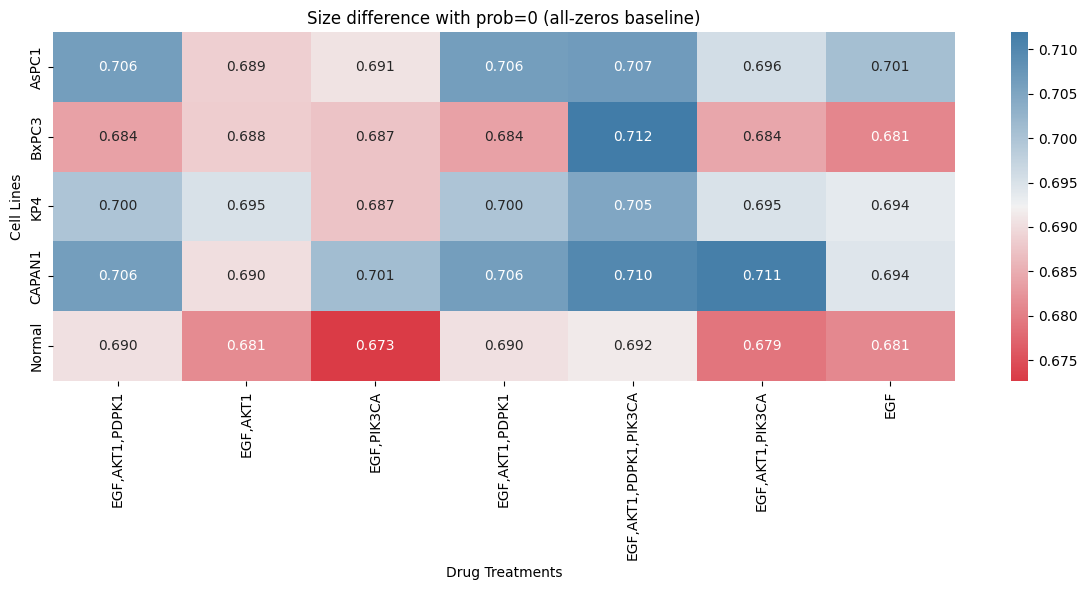

Running simulation with probability = 0.1
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


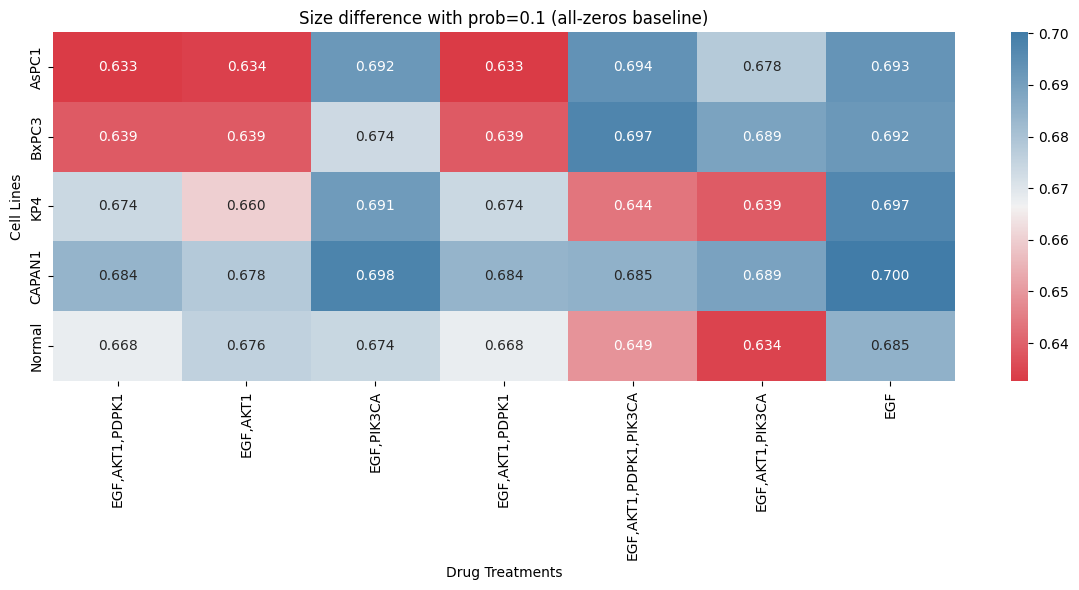

Running simulation with probability = 0.2
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


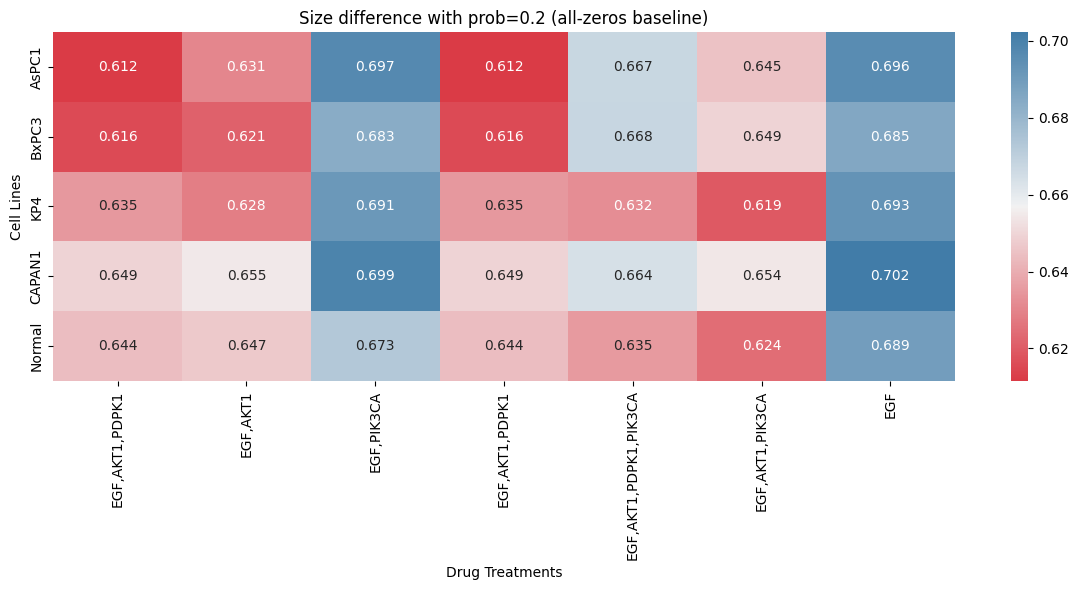

Running simulation with probability = 0.3
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


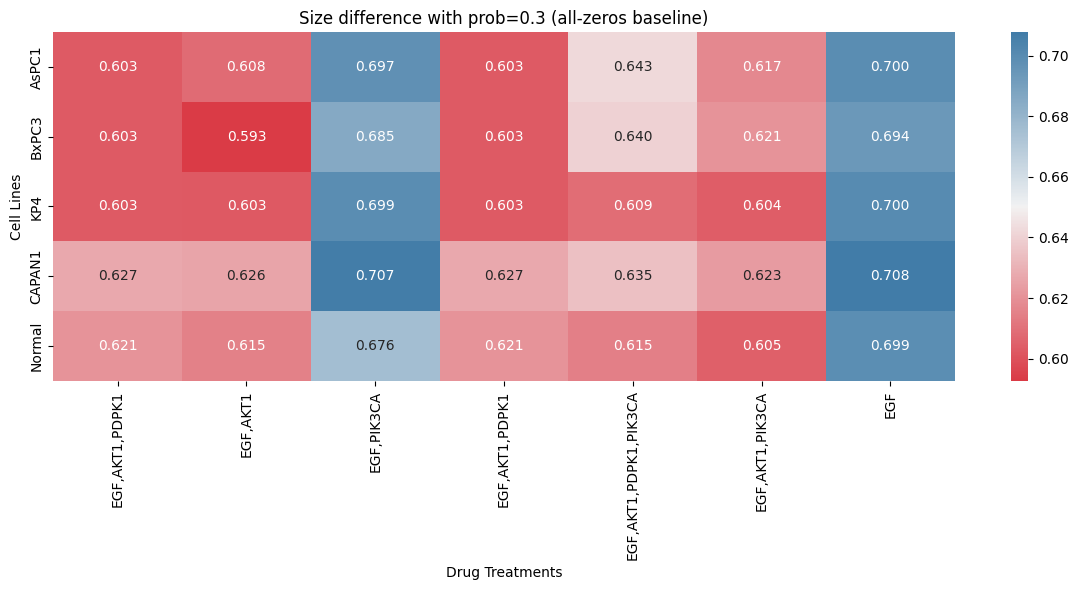

Running simulation with probability = 0.4
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


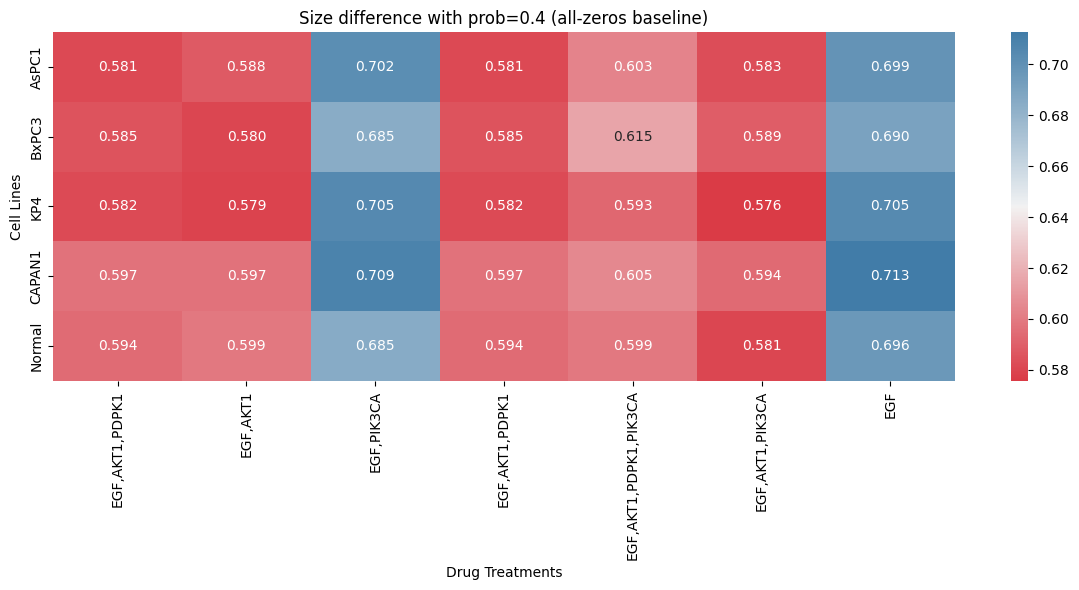

Running simulation with probability = 0.5
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


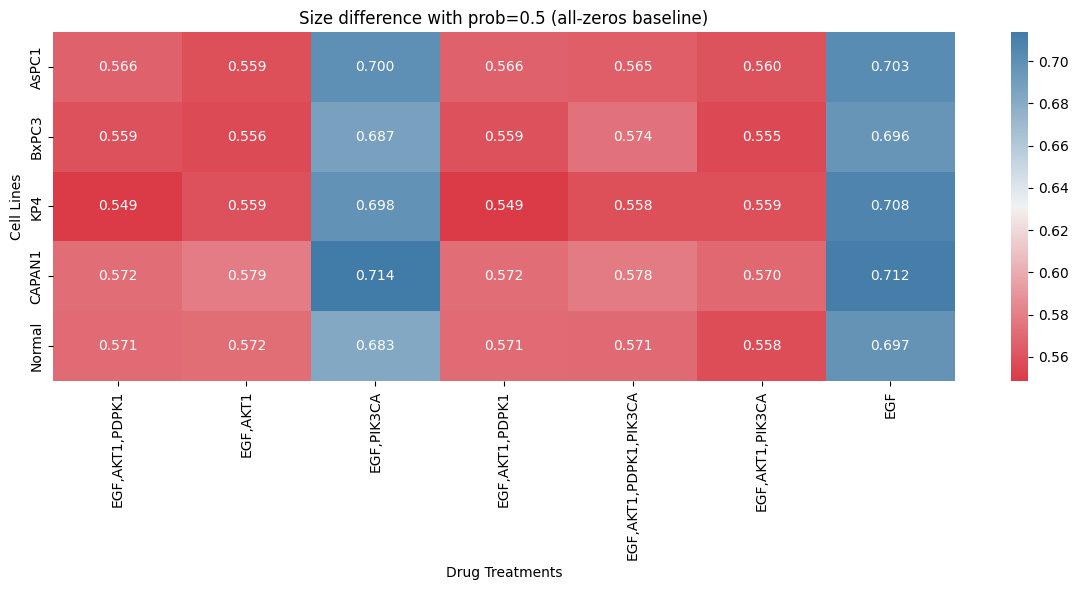

Running simulation with probability = 0.6
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


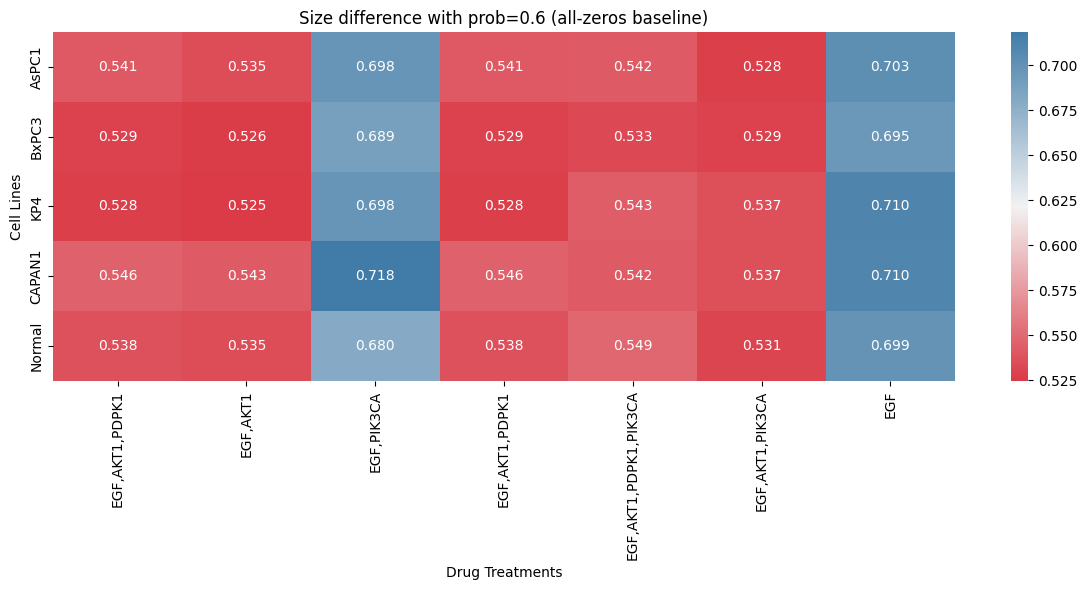

Running simulation with probability = 0.7
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


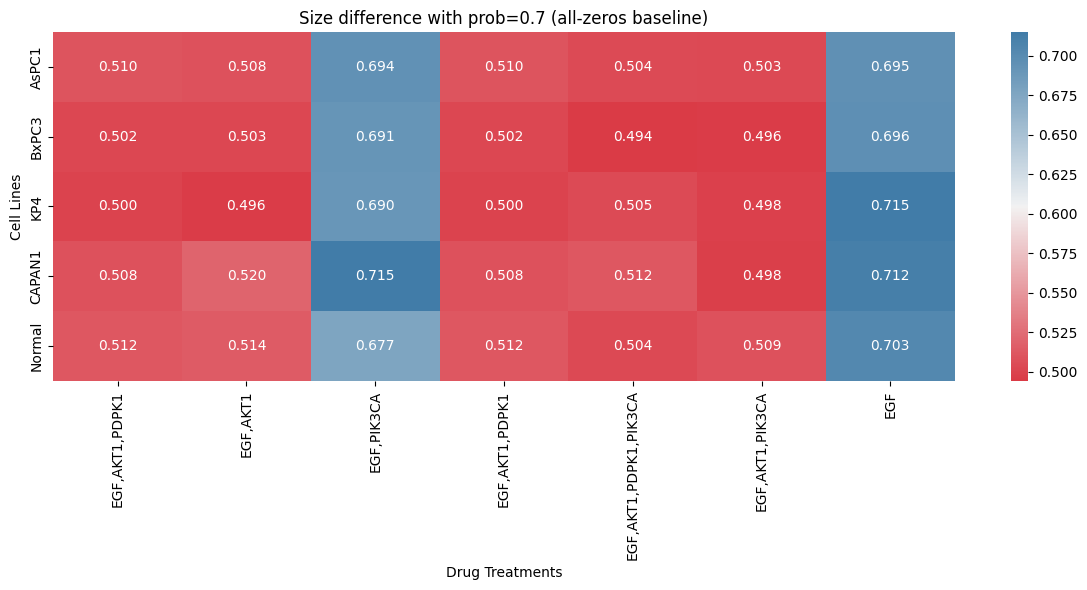

Running simulation with probability = 0.8
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


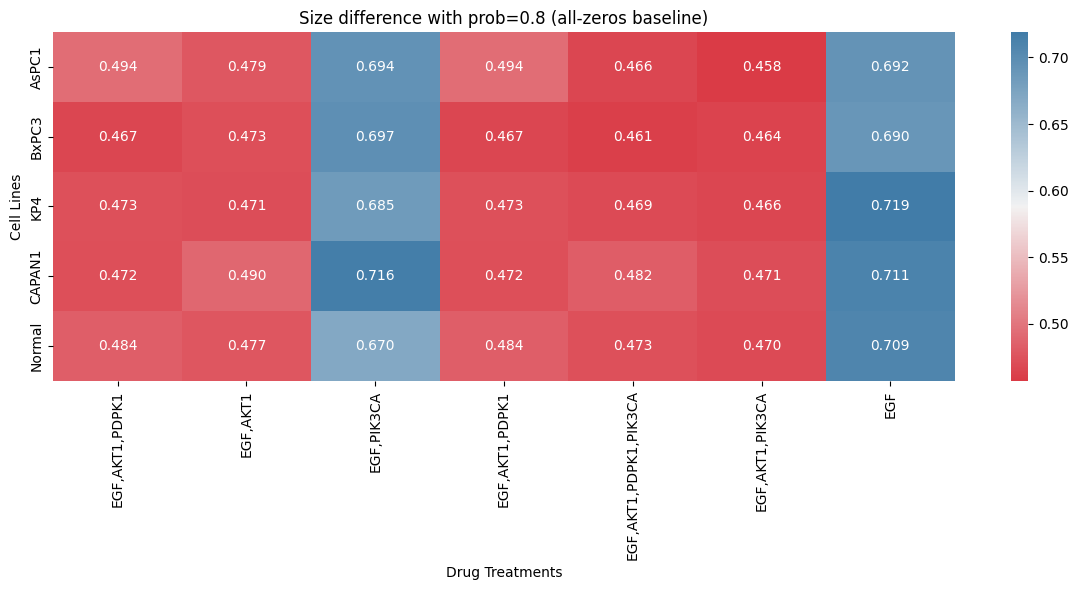

Running simulation with probability = 0.9
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


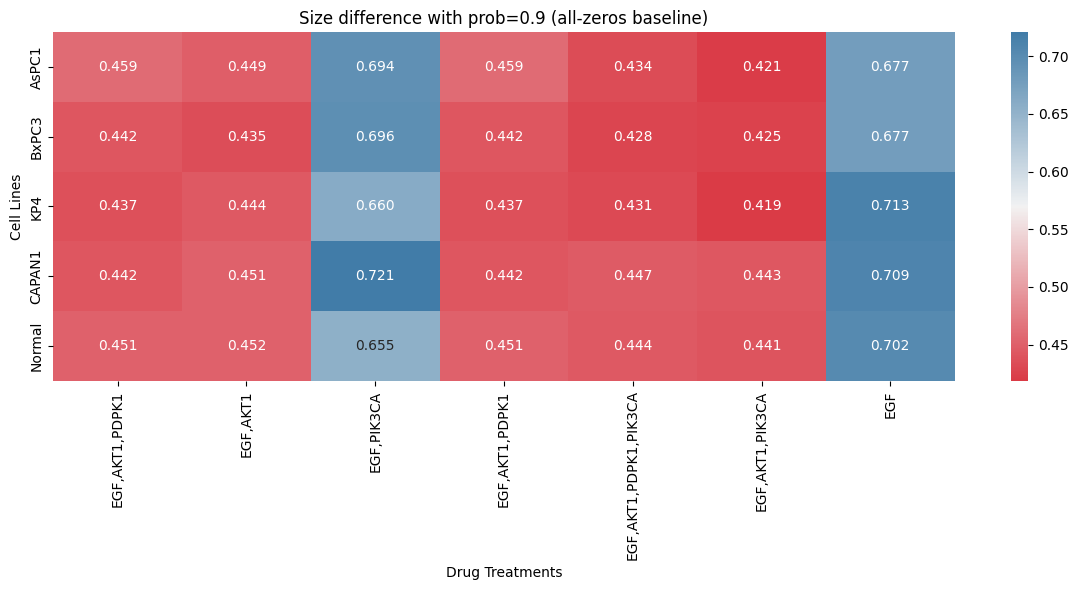

Running simulation with probability = 1
Only KG model has this target: PRKACA
Only original model has this target: AktP
Only original model has this target: PIP3
Only original model has this target: AktM
Only original model has this target: Mito
No initial state provided, using a random initial state


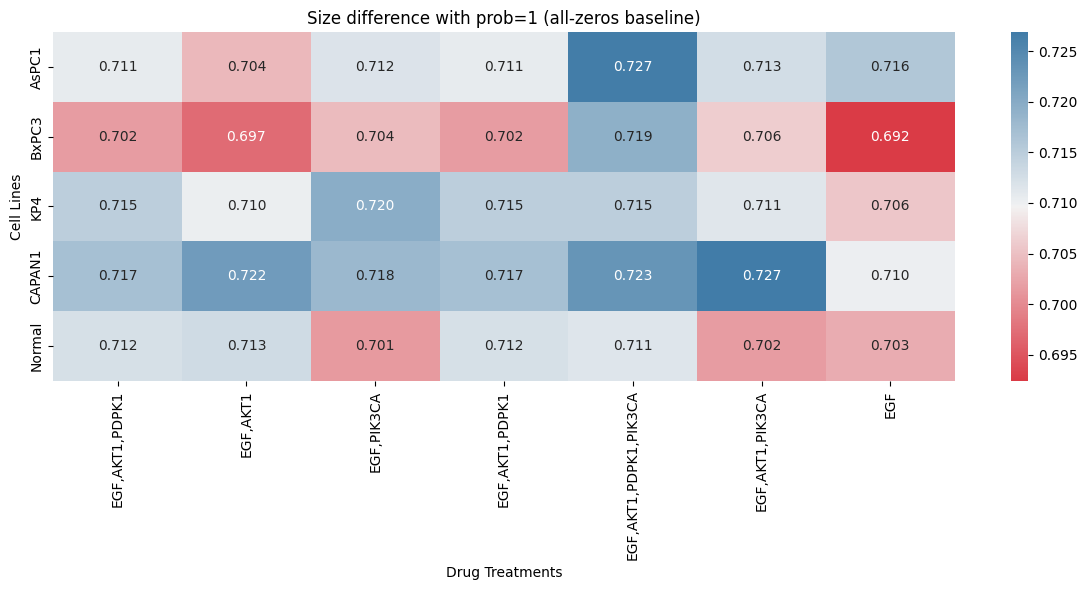

In [11]:
# Run sensitivity analysis for multiple probability values
prob_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
sensitivity_results = {}

for prob in prob_values:
    print(f"Running simulation with probability = {prob}")
    results = run_pbn_simulation(prob)
    sensitivity_results[prob] = results
    
    cmap = sns.diverging_palette(10, 240, as_cmap=True)  # Red to blue

    # visualize each result individually
    plt.figure(figsize=(12, 6))
    sns.heatmap(results.astype(float), annot=True, cmap=cmap, fmt=".3f")
    plt.title(f"Size difference with prob={prob} (all-zeros baseline)")
    plt.ylabel("Cell Lines")
    plt.xlabel("Drug Treatments")
    plt.tight_layout()
    plt.show()

In [12]:
# Save the results dictionary
with open('output/Eduati2020_sensitivity_results.pkl', 'wb') as f:
    pickle.dump(sensitivity_results, f)

In [10]:
# Load it back
with open('output/Eduati2020_sensitivity_results.pkl', 'rb') as f:
    sensitivity_results = pickle.load(f)

## Mean outcome value


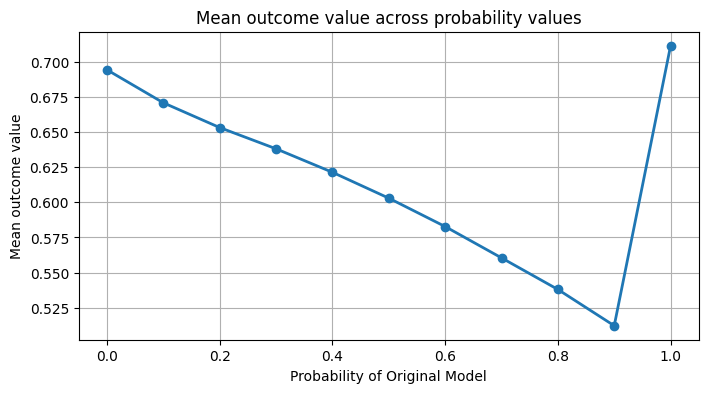

In [13]:
# Calculate sensitivity metrics
# mean size difference for each probability value
mean_differences = {}
for prob, results_df in sensitivity_results.items():
    mean_differences[prob] = results_df.values.mean()

# Plot how mean size difference changes with probability
plt.figure(figsize=(8, 4))
plt.plot(list(mean_differences.keys()), list(mean_differences.values()), 'o-', linewidth=2)
plt.xlabel('Probability of Original Model')
plt.ylabel('Mean outcome value')
plt.title('Mean outcome value across probability values')
plt.grid(True)
plt.show()

## Variance across probability values

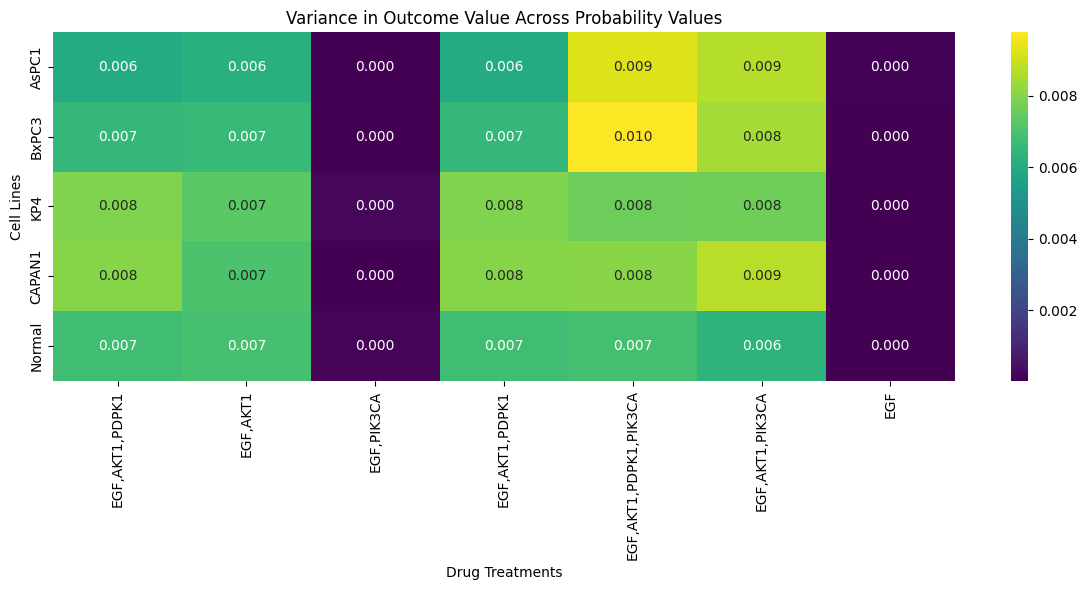

In [14]:
variance_df = pd.DataFrame(index=cell_profiles.keys(), columns=all_treatments)

for cell_line in cell_profiles.keys():
    for treatment in all_treatments:
        # Get values for this cell-treatment combo across all probabilities
        values = [df.loc[cell_line, treatment] for df in sensitivity_results.values()]
        variance_df.loc[cell_line, treatment] = np.var(values)

# Visualize variance with heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(variance_df.astype(float), annot=True, cmap="viridis", fmt=".3f")
plt.title("Variance in Outcome Value Across Probability Values")
plt.ylabel("Cell Lines")
plt.xlabel("Drug Treatments")
plt.tight_layout()
plt.show()

# Target-specific sensitivity

Perform a more detailed sensitivity analysis to evaluate the impact of changing the probability for individual equations rather than using the same probability value for all equations.

In [32]:
def merge_PBN_string_individual_probs(new_string, KG_string, prob_dict=None, default_prob=0.5):
    """
    Merge the original model and the KG model to a PBN with individual probabilities
    
    Args:
        new_string: String representation of original model
        KG_string: String representation of KG model
        prob_dict: Dictionary mapping gene names to probabilities for the original model
        default_prob: Default probability to use for genes not in prob_dict
    
    Returns:
        Merged PBN string with individualized probabilities
    """
    if prob_dict is None:
        prob_dict = {}
    
    # Parse equations from both models
    original_equations = {}
    for line in new_string.strip().split('\n'):
        if '=' in line:
            target, rule = line.split('=', 1)
            original_equations[target.strip()] = rule.strip()
    
    kg_equations = {}
    for line in KG_string.strip().split('\n'):
        if '=' in line:
            target, rule = line.split('=', 1)
            kg_equations[target.strip()] = rule.strip()
    
    # Merge equations
    merged_equations = []
    all_targets = set(original_equations.keys()) | set(kg_equations.keys())
        
    for target in all_targets:
        # Get the probability for this target (use default if not specified)
        target_prob = prob_dict.get(target, default_prob)
        
        if target in original_equations and target in kg_equations:
            if original_equations[target] == kg_equations[target]:
                # Both models have the same equation for this target
                merged_equations.append(f"{target} = {original_equations[target]}, 1")
            else:
                # Use both with specified probabilities
                merged_equations.append(f"{target} = {original_equations[target]}, {target_prob}")
                merged_equations.append(f"{target} = {kg_equations[target]}, {1-target_prob}")
        elif target in original_equations:
            # Only original model has this target
            merged_equations.append(f"{target} = {original_equations[target]}, 1")
        else:
            # Only KG model has this target
            merged_equations.append(f"{target} = {kg_equations[target]}, 1")
    
    # remove equation with prob = 0
    merged_equations = [eq for eq in merged_equations if eq.split(',')[1] != ' 0']
    merged_string = '\n'.join(merged_equations)
    return merged_string

def run_pbn_simulation_with_pbn(pbn, noise=0.05, n_steps=50000):
    """
    Run PBN simulation with a pre-loaded PBN object.
    """
    # Initialize results dataframe
    df_results = pd.DataFrame(index=cell_profiles.keys(), columns=all_treatments)
    
    # Process each cell line
    for cell_line, mutation_profile in cell_profiles.items():
        mutations = mutation_profile.split(',') if mutation_profile else []
        
        # Process each drug treatment
        for condition in all_treatments:
            pbn.undoKnockouts()

            # Apply mutations based on cell line 
            for gene in mutations:
                if gene.strip(): 
                    pbn.knockout(gene, mutations_dict[gene])
           
            # Apply drug effects
            for ko_gene in condition.split(','):
                pbn.knockout(ko_gene, 0)
            
            # Run simulation
            results = pbn.update_noise(noise, n_steps) 
            cal_range = results[n_steps//2:n_steps]
            average_array = np.mean(cal_range, axis=0)
            output_value = average_array[pbn.nodeDict['CASP3']]
            df_results.loc[cell_line, condition] = output_value  # Store as scalar, not list
            
    return df_results

def run_individual_sensitivity_analysis(default_prob = 1, test_prob_values = [0.0, 0.25, 0.5, 0.75]):
    """
    Run sensitivity analysis by varying the probability of each individual equation.
    test_prob_values is a list of probability values to test.
    default_prob is the probability value to use for the base case.
    """
    # Get all targets that have different equations in both models
    original_equations = {}
    for line in new_string.strip().split('\n'):
        if '=' in line:
            target, rule = line.split('=', 1)
            original_equations[target.strip()] = rule.strip()
    
    kg_equations = {}
    for line in KG_string.strip().split('\n'):
        if '=' in line:
            target, rule = line.split('=', 1)
            kg_equations[target.strip()] = rule.strip()
    
    differing_targets = []
    for target in set(original_equations.keys()) & set(kg_equations.keys()):
        if original_equations[target] != kg_equations[target]:
            differing_targets.append(target)
    
    print(f"Found {len(differing_targets)} targets with different equations in both models")
    
    # Base case - all equations use default probability
    base_prob_dict = {target: default_prob for target in differing_targets}
    
    # Run base simulation
    base_merged_string = merge_PBN_string_individual_probs(new_string, KG_string, base_prob_dict)
    print(base_merged_string)
    base_pbn = BMatrix.load_pbn_from_string(base_merged_string)
    base_results = run_pbn_simulation_with_pbn(base_pbn)
    
    # Test each target individually
    sensitivity_by_target = {}
    
    for target in differing_targets:
        target_sensitivity = {}
        
        for test_prob in test_prob_values:
            # Make a copy of the base probability dictionary
            test_prob_dict = base_prob_dict.copy()
            # Change only the probability for the current target
            test_prob_dict[target] = test_prob
            
            print(f"Testing {target} with probability {test_prob}")
            test_merged_string = merge_PBN_string_individual_probs(new_string, KG_string, test_prob_dict)
            test_pbn = BMatrix.load_pbn_from_string(test_merged_string)
            test_results = run_pbn_simulation_with_pbn(test_pbn)
            
            # Calculate difference from base case
            # Ensure both DataFrames are float type for arithmetic
            test_results_float = test_results.astype(float)
            base_results_float = base_results.astype(float)
            diff_results = (test_results_float - base_results_float).abs()
            
            # Store mean and max difference
            target_sensitivity[test_prob] = {
                'mean_diff': diff_results.values.mean(),
                'max_diff': diff_results.values.max(),
                'results': test_results,
                'diff_results': diff_results
            }
        
        sensitivity_by_target[target] = target_sensitivity
    
    return sensitivity_by_target, differing_targets, base_results

In [33]:
sensitivity_results_by_target, differing_targets, base_results = run_individual_sensitivity_analysis(test_prob_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])


Found 37 targets with different equations in both models
CASP8 = (RIPK1 & TRADD & TRAF2) | ! BIRC2, 1
MAP3K14 = ! BIRC2, 1
STAT3 = JAK1, 1
EGF = EGF, 1
PRKACA = AKT1, 1
AktP = PDPK1 & PIP3, 1
BID = MAPK8 & TP53 | CASP8 & TP53 | ! BCL2L1, 1
AKT1 = AktM & AktP, 1
CASP12 = CASP7, 1
APC = APAF1 & CASP9 & Mito | ! BIRC2, 1
PDPK1 = PDPK1, 1
NFKBIA = NFKB1 | ! IKBKB, 1
IKBKB = (RIPK1 & TRADD & TRAF2) | PDPK1 | AKT1 | ! TNFAIP3, 1
MAP2K1 = RAF1 | PDPK1, 1
EGFR = EGF, 1
BCL2L1 = ! TP53 | STAT3 | NFKB1 | ! BAD, 1
PTEN = TP53, 1
RIPK1 = (RIPK1 & TRADD & TRAF2) | ! BIRC2, 1
TRADD = (RIPK1 & TRADD & TRAF2) | ! BIRC2, 1
MAPK8 = MAP2K4, 1
MAPK1 = MAP2K1, 1
CASP7 = ! BIRC2 | CASP8 | APC, 1
CASP9 = ! BIRC2 | ! MAPK1 | CASP3 | CASP12 | ! AKT1, 1
BIRC2 = ! CASP3 & ! CASP6 | NFKB1 | ! Mito, 1
RPS6KA1 = MAPK1, 1
TRAF2 = TNFRSF1A, 1
MAP3K1 = (RIPK1 & TRADD & TRAF2) | KRAS, 1
RAF1 = KRAS, 1
CASP3 = ! BIRC2 | CASP8 | CASP6 | APC, 1
CFLAR = (RIPK1 & TRADD & TRAF2) | ! BIRC2, 1
PIP3 = ! PTEN | PIK3CA, 1
KRAS = 

In [34]:
# Save the results dictionary
with open('output/Eduati2020_sensitivity_results_by_target.pkl', 'wb') as f:
    pickle.dump(sensitivity_results_by_target, f)

In [ ]:
# Load the results dictionary
with open('output/Eduati2020_sensitivity_results_by_target.pkl', 'rb') as f:
    sensitivity_results_by_target = pickle.load(f)

In [38]:
sensitivity_results_by_target['AKT1']

{0.0: {'mean_diff': 0.18385142857142853,
  'max_diff': 0.29812,
  'results':        EGF,AKT1,PDPK1 EGF,AKT1 EGF,PIK3CA EGF,AKT1,PDPK1  \
  AsPC1         0.42056  0.43976    0.69776        0.42056   
  BxPC3         0.48356  0.49576    0.70632        0.48356   
  KP4           0.44212  0.43072     0.7096        0.44212   
  CAPAN1        0.42424  0.62512    0.70628        0.42424   
  Normal        0.55916  0.54328    0.69672        0.55916   
  
         EGF,AKT1,PDPK1,PIK3CA EGF,AKT1,PIK3CA      EGF  
  AsPC1                0.44528         0.42876  0.71236  
  BxPC3                0.42764         0.43752  0.69292  
  KP4                  0.43372         0.44516  0.70592  
  CAPAN1               0.43548          0.4214  0.72948  
  Normal               0.42724         0.45084   0.6942  ,
  'diff_results':         EGF,AKT1,PDPK1  EGF,AKT1  EGF,PIK3CA  EGF,AKT1,PDPK1  \
  AsPC1          0.29256   0.27936     0.02372         0.29256   
  BxPC3          0.21040   0.22428     0.00076       

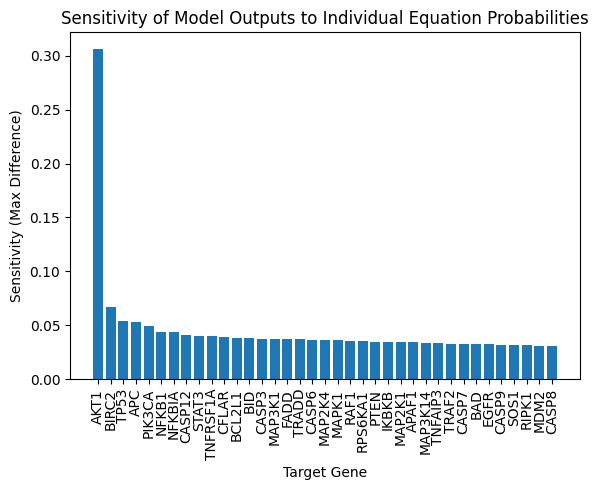

In [36]:
sensitivity_scores = {}
for target in differing_targets:
    # Maximum difference observed for any test probability
    max_sensitivity = max([data['max_diff'] for prob, data in sensitivity_results_by_target[target].items()])
    sensitivity_scores[target] = max_sensitivity

# Create a bar chart of target sensitivities
plt.figure(figsize=(6, 5))
targets_sorted = sorted(sensitivity_scores.items(), key=lambda x: x[1], reverse=True)
x = [item[0] for item in targets_sorted]
y = [item[1] for item in targets_sorted]
plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Target Gene')
plt.ylabel('Sensitivity (Max Difference)')
plt.title('Sensitivity of Model Outputs to Individual Equation Probabilities')
plt.tight_layout()
plt.show()

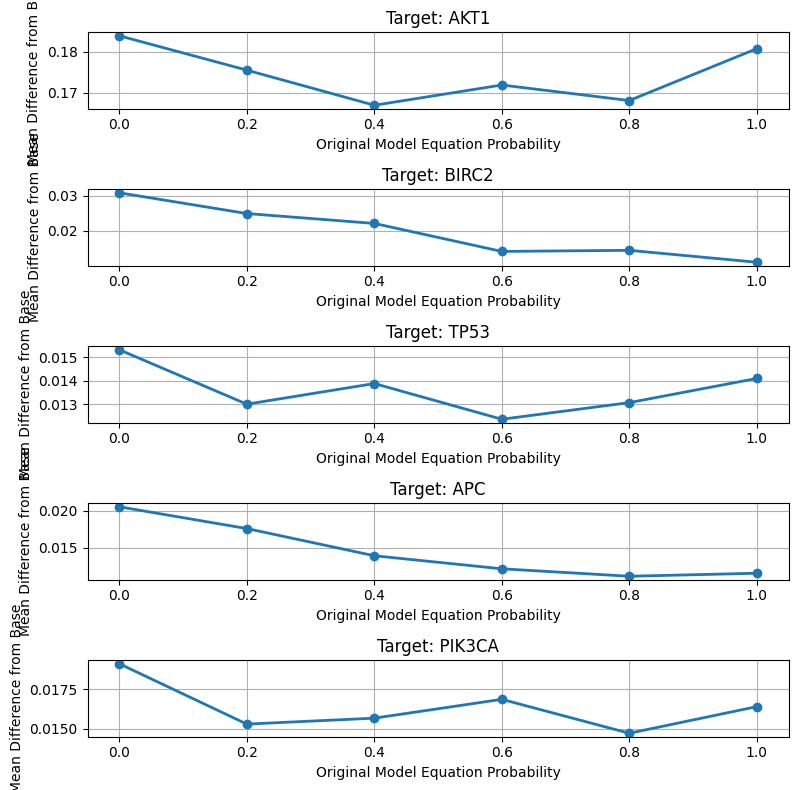

In [42]:
# visualization for the most sensitive targets
top_targets = x[:5]  # Take the top 5 most sensitive targets
plt.figure(figsize=(8, 8))
for i, target in enumerate(top_targets):
    plt.subplot(len(top_targets), 1, i+1)
    
    # Get the test probability values used
    prob_values = sorted(sensitivity_results_by_target[target].keys())
    
    # Plot mean difference for each probability value
    mean_diffs = [sensitivity_results_by_target[target][p]['mean_diff'] for p in prob_values]
    plt.plot(prob_values, mean_diffs, 'o-', linewidth=2)
    
    plt.title(f'Target: {target}')
    plt.xlabel('Original Model Equation Probability')
    plt.ylabel('Mean Difference from Base')
    plt.grid(True)
    
plt.tight_layout()
plt.show()

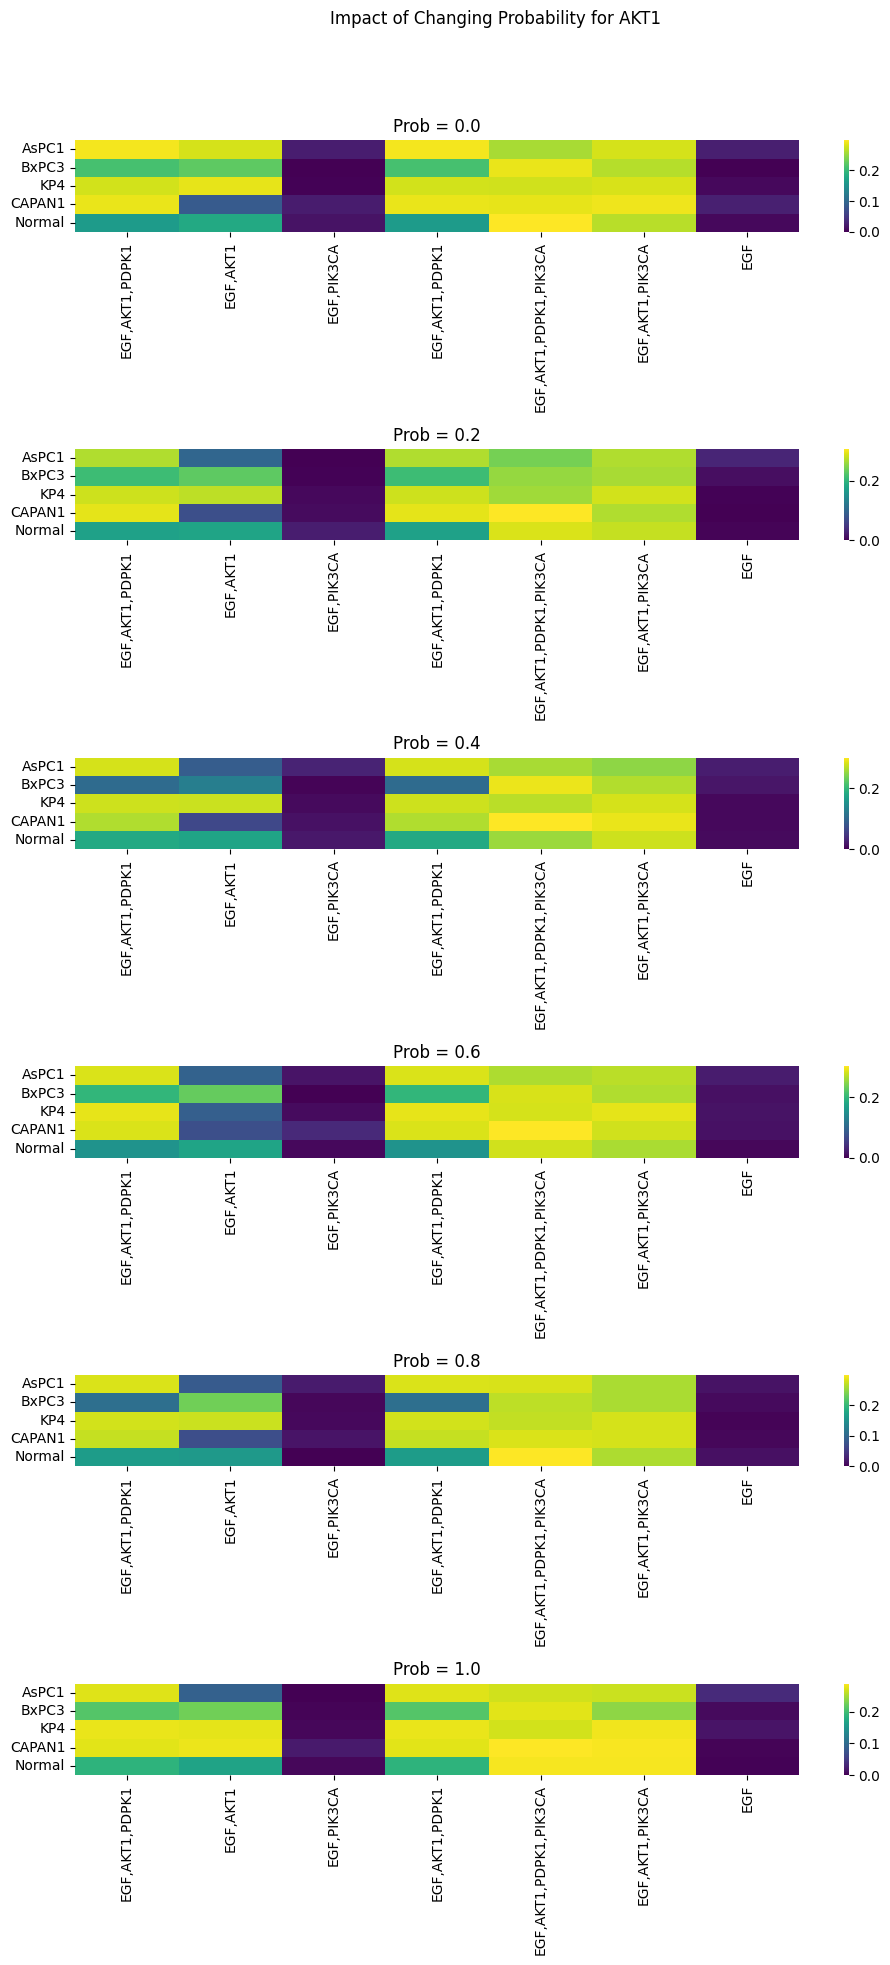

In [46]:
# heatmaps for the most sensitive target
most_sensitive_target = targets_sorted[0][0]
# Plot difference heatmaps for various probability values
fig, axes = plt.subplots(len(sensitivity_results_by_target[most_sensitive_target]), 1,
                         figsize=(10, 20), sharey=True)
for i, prob in enumerate(sorted(sensitivity_results_by_target[most_sensitive_target].keys())):
    data = sensitivity_results_by_target[most_sensitive_target][prob]['diff_results'].astype(float)
    sns.heatmap(data, ax=axes[i], cmap='viridis', 
                vmin=0, vmax=data.values.max())
    axes[i].set_title(f'Prob = {prob}')
    if i > 0:
        axes[i].set_ylabel('')
plt.suptitle(f'Impact of Changing Probability for {most_sensitive_target}')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()